## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddata = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combineddata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

total_mice = combineddata["Mouse ID"].unique()
len(total_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combineddata[combineddata.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combineddata.loc[(combineddata["Mouse ID"]!="g989)]")]

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_length = cleaned_data["Mouse ID"].unique()

len(cleaned_data_length)

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_of_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
sum_of_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_of_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_of_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sum_of_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_dataframe = pd.DataFrame({"Mean": sum_of_mean,
                                  "Median": sum_of_median,
                                  "Variance": sum_of_variance,
                                  "Standard Deviation": sum_of_std,
                                  "SEM": sum_of_sem
})

summary_dataframe



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


groupby_dataframe = combineddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

                                                           
groupby_dataframe


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints for All Mice Tested for Each Drug Regimen')

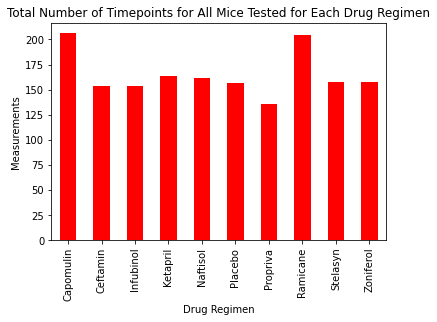

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart = combineddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].nunique().plot(kind = "bar", color = "red")

bar_chart

bar_chart.set_ylabel("Measurements")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")

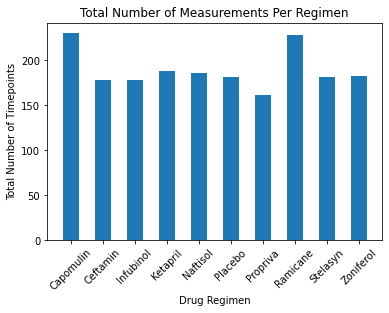

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',

           'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

drug_regimen = (cleaned_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

plt.bar(labels, drug_regimen, 0.5)
plt.ylabel("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements Per Regimen")
plt.xticks(rotation = 45)
plt.show()


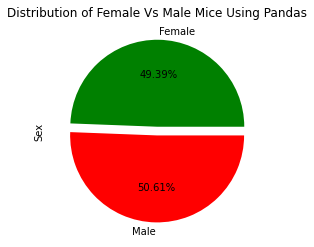

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ["green", "red"]
explode = [0.05,0.05]

gender_plot = cleaned_data.groupby("Sex")["Sex"].count()

pie_chart = gender_plot.plot(kind="pie", y="Mouse ID", autopct='%1.2f%%', explode=explode, colors=colors, title = "Distribution of Female Vs Male Mice Using Pandas")





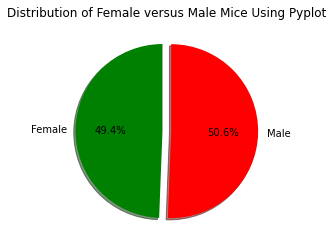

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["green", "red"]
explode = [0.05,0.05]

pyplot_gender_plot = cleaned_data.groupby("Sex")["Sex"].count()

plt.pie(pyplot_gender_plot, autopct="%1.1f%%", explode=explode, colors=colors, startangle=90, shadow = True, labels = pyplot_gender_plot.index)
plt.title("Distribution of Female versus Male Mice Using Pyplot")



plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

volume_regimens = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
volume_regimens_dataframe = pd.DataFrame(volume_regimens)


volume_regimens_dataframe




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

volume_regimens_dataframe = pd.merge(cleaned_data, volume_regimens_dataframe, on=("Mouse ID","Timepoint"), how="right")

volume_regimens_dataframe



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [14]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rows in treatments_list:
        
        # Locate the rows which contain mice on each drug and get the tumor volumes
        mice_tumor_vol = volume_regimens_dataframe.loc[volume_regimens_dataframe["Drug Regimen"]==rows]
        results = mice_tumor_vol["Tumor Volume (mm3)"]
        tumor_volume.append(results)
    
        # Locate the rows which contain mice on each drug and get the tumor volumes
        mice_tumor_vol = volume_regimens_dataframe.loc[volume_regimens_dataframe["Drug Regimen"]==rows]
        results = mice_tumor_vol["Tumor Volume (mm3)"]
        tumor_volume.append(results)
    
    # add subset 
    
        quartiles = round(results.quantile([.25,.5,.75]),3)
        lower_quartile = round(quartiles[0.25],3)
        upper_quartile = round(quartiles[0.75],3)
        interquartile_range = round(upper_quartile - lower_quartile,3)

    
    # Determine outliers using upper and lower bounds
    
        lower_outlier = round(lower_quartile - (1.5*interquartile_range),3)
        upper_outlier = round(upper_quartile - (1.5*interquartile_range),3)
    
    
    # Printing the results
    
        print (f"----------------------------------------------------")
        print (f"{rows} Drug Regimen")
        print (f"----------------------------------------------------")
        print (f"Lower quartile of the tumor volume is: {lower_quartile}")
        print (f"Upper quartile of the tumor volume is: {upper_quartile}")
        print (f"Interquartile range of the tumor volume is: {interquartile_range}")
        print (f"The median value of the tumer volume is {quartiles[0.5]}")
        print (f"Anything below value {lower_outlier} could be outliers")
        print (f"Anything above value {upper_outlier} could be outliers/n")

    
    

----------------------------------------------------
Capomulin Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 32.377
Upper quartile of the tumor volume is: 40.159
Interquartile range of the tumor volume is: 7.782
The median value of the tumer volume is 38.125
Anything below value 20.704 could be outliers
Anything above value 28.486 could be outliers/n
----------------------------------------------------
Ramicane Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 31.56
Upper quartile of the tumor volume is: 40.659
Interquartile range of the tumor volume is: 9.099
The median value of the tumer volume is 36.562
Anything below value 17.911 could be outliers
Anything above value 27.01 could be outliers/n
----------------------------------------------------
Infubinol Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 54.049
Uppe

## Line and Scatter Plots

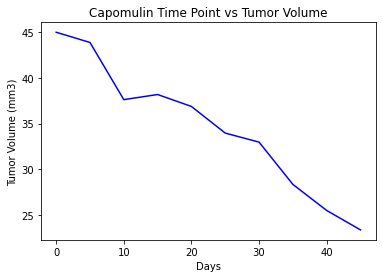

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = cleaned_data.loc[cleaned_data["Mouse ID"]=="s185"]
plt.plot(line_plot["Timepoint"],line_plot["Tumor Volume (mm3)"], color="blue")

#Labels
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Time Point vs Tumor Volume")

#Gte rid of text
plt.show()






In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatterplot = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]

#Calcualting the average tumour volume
average_tumor_volume = pd.DataFrame(scatterplot.groupby("Mouse ID").mean())
average_tumor_volume





,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


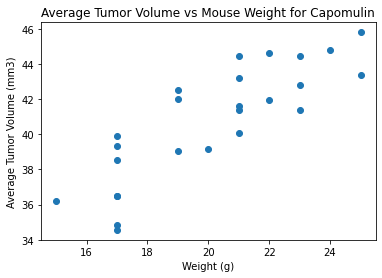

In [33]:
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])


#Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")


#Get rid of text above
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The Correlation Coefficient of the Mouse Weight vs Average Tumor Volume for Capomulin regimen is 0.84


/var/folders/pd/tm2yj2hx5rb87k62xyb5tj6w0000gn/T/ipykernel_37962/2666018458.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_value,line_of_best_fit,"r-", color='yellow')


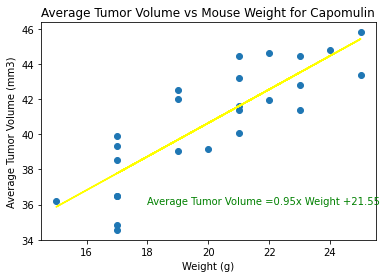

In [40]:
x_value = scatterplot.groupby(scatterplot["Mouse ID"])["Weight (g)"].mean()
y_value = scatterplot.groupby(scatterplot["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Setting up the regression line
slope,intercept, r_value, p_value, std_err = st.linregress(x_value,y_value)
line_of_best_fit = slope * x_value + intercept
regression_equation = "Average Tumor Volume =" + str(round(slope,2)) + "x Weight +" + str(round(intercept,2))

#plotting results

plt.scatter(x_value,y_value)
plt.plot(x_value,line_of_best_fit,"r-", color='yellow')

#formatting the graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.annotate(regression_equation,(18,36),fontsize = 10, color = "green")

#Printing the correlation coeffecient
print(f"The Correlation Coefficient of the Mouse Weight vs Average Tumor Volume for Capomulin regimen is {round(st.pearsonr(x_value,y_value)[0],2)}")


